In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [36]:
df=pd.read_csv('/content/student_marks_prediction.csv')
df.head()

,Study Time (hours),Playtime (hours),Attendance (%),Sleep (hours),Previous Marks,Screentime (hours),Final Score
0,3.745401,3.490809,59.256646,7.114491,48.319398,6.792632,60.658291
1,9.507143,2.680482,77.095047,6.875091,47.288516,6.351695,100.000000
2,7.319939,1.547638,93.647292,4.153852,93.437821,5.014703,100.000000
3,5.986585,4.068975,86.611244,6.047487,47.468234,7.692330,77.675639
4,1.560186,3.423656,90.328057,6.281174,49.036481,2.403322,69.950572


# Explore the data

In [37]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Study Time (hours)  Playtime (hours)  Attendance (%)  Sleep (hours)  \
0            3.745401          3.490809       59.256646       7.114491   
1            9.507143          2.680482       77.095047       6.875091   
2            7.319939          1.547638       93.647292       4.153852   
3            5.986585          4.068975       86.611244       6.047487   
4            1.560186          3.423656       90.328057       6.281174   

   Previous Marks  Screentime (hours)  Final Score  
0       48.319398            6.792632    60.658291  
1       47.288516            6.351695   100.000000  
2       93.437821            5.014703   100.000000  
3       47.468234            7.692330    77.675639  
4       49.036481            2.403322    69.950572  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -------------- 

# Check for missing values

In [38]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Study Time (hours)    0
Playtime (hours)      0
Attendance (%)        0
Sleep (hours)         0
Previous Marks        0
Screentime (hours)    0
Final Score           0
dtype: int64


# Drop rows with missing values

In [39]:
df.dropna(inplace=True)

# Separate features (X) and target (y)

In [40]:
X=df.drop('Final Score',axis=1)
y=df['Final Score']

# Split the data into training and testing sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model

In [30]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Make predictions

In [31]:
y_pred = model.predict(X_test_scaled)
y_pred

array([ 87.76215571, 100.03315181,  67.3944706 ,  76.81115914,
       120.73525999,  87.57830076,  73.59003289,  84.01663471,
        48.87414603,  80.58059389,  85.16794569,  56.68999962,
        73.31502876,  82.92200118,  60.57981666, 104.44997367,
        78.0150734 ,  67.777876  ,  72.28658532, 115.83350471,
        76.68338708,  71.04272852,  96.78918901,  87.93388288,
        79.12722491, 100.86496804,  76.75562161,  93.43399416,
       102.78744665,  65.27065937, 125.81743064,  79.44507892,
        75.95280786,  83.17074637, 104.3299076 ,  85.62742794,
        71.68947164,  99.26573946,  87.92013881,  83.84378799,
        92.13481639,  84.58773447,  99.3093916 , 114.58760481,
       112.55973969,  62.77381142,  61.78435979,  94.87397152,
        97.13252851,  88.55712436,  54.78037073, 101.89881868,
        52.96056517,  78.07214989,  91.77081187,  94.4129432 ,
        69.67334318,  66.15018482,  91.98124843,  87.67383656,
        91.33095557,  72.45409103,  72.49552617,  72.06

# Calculate evaluation metrics

In [32]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Print the results


In [33]:
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")


Model Performance Metrics:
Mean Absolute Error (MAE): 6.122698517322184
Mean Squared Error (MSE): 63.040855754317555
R-squared Score (R²): 0.7881879698615597


#Visualize actual vs predicted scores

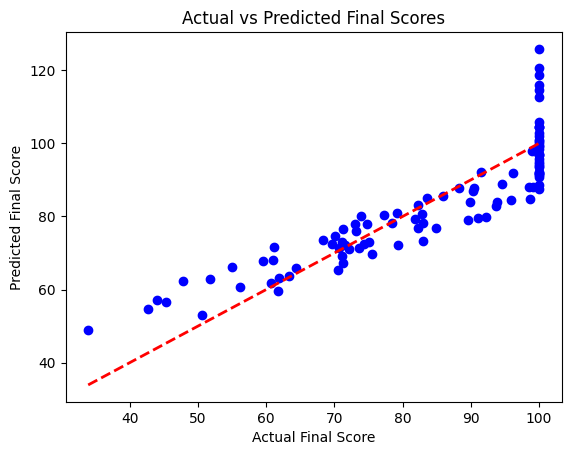

In [34]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted Final Scores')
plt.show()